<function matplotlib.pyplot.show(close=None, block=None)>

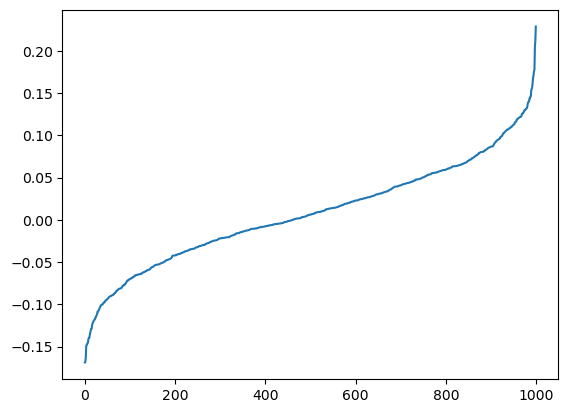

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def get_bandit_function(k):
    mean, deviation = 0, 1                                                 
    rng = np.random.default_rng()                               
    bandit_means = []
    for x in range(k):                                          #draw k gaussian random numbers q_i as centers
        bandit_means.append(rng.normal(mean, deviation))

    def bandit_function(action):                                #define a function which expects a parameter action and returns a random number from N(q_i,1)
        return rng.normal(bandit_means[action], 1)

    return bandit_function, bandit_means                        #return that function and a list of the q_i's


reward = [0] * 1000
rnd_int = np.random.randint
ep = 500                            #episodes
steps = 1000                        #steps per episode

for _ in range(ep):
    func, _ = get_bandit_function(10)
    for i in range(steps):
        reward[i] += func(rnd_int(0,10))

reward_average = list(map(lambda x: x / ep, reward))

plt.plot(np.sort(reward_average))
plt.show


In [5]:
def update_Q_and_N(Q,N,r,a):
    N[a] += 1
    Q[a] = Q[a] + 1/(N[a]) * (r - Q[a])
    return Q, N

Q = [0] * 10
N = [0] * 10
b_func, list = get_bandit_function(10)

for x in range(100000):
    a = rnd_int(0,10)
    Q, N =update_Q_and_N(Q,N,b_func(a),a)

print(Q)
print(list)

[-0.14885454785215704, -1.6161180830178201, -0.16177622581353884, 0.9163909375129897, -0.9842275806112665, 0.49955987611378455, 0.7046746787143638, -0.5265753538620438, 0.512488517608189, 0.433364185509316]
[-0.14701877801416852, -1.6223171102327927, -0.1642011907695772, 0.9120052892324163, -0.992977677153837, 0.49649313904379744, 0.6939948608610784, -0.525513854096942, 0.5094209115112741, 0.4528619606539626]


In [34]:
#Greedy

Q = [0] * 10
Q[1] = 3
N = [0] * 10
b_func, list = get_bandit_function(10)
a = []

for x in range(100000):
    max_a = np.argwhere(Q == np.max(Q))
    if len(max_a) > 1:
        a = np.random.choice(np.ravel(max_a))
    else:
        a = max_a[0][0]
    Q, N = update_Q_and_N(Q,N,b_func(a),a)

print(Q)    
print(N)
print(list)


[0, 0.26818800659866404, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 100000, 0, 0, 0, 0, 0, 0, 0, 0]
[-0.20852995621132847, 0.264963257872172, -2.330825830089017, 0.680845356005066, -0.7052264937615899, 0.08322473123901954, 0.562605867555565, 0.6241116159023352, -0.3163970575772904, 0.17539404355569613]


In [ ]:
#e greedy